<a href="https://colab.research.google.com/github/juan-medinaf/12-CHL5230-Datathon--6/blob/main/all_datathon_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from sklearn.discriminant_analysis import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

warnings.filterwarnings('ignore')

In [3]:
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
from scipy.stats import chi2
import warnings
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [5]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [6]:
import torch as t
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [9]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [10]:
import shap

In [11]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [12]:
from category_encoders import OneHotEncoder, TargetEncoder

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
!pip install wordcloud
from wordcloud import WordCloud

# Word Cloud based on research papers at the intersection of Long Covid and Machine Learning

For this section, I gathered the titles, abstract and discussion sections of 50 academic papers at the intersection of Long Covid and Machine Learning

In [11]:
from google.colab import files
uploaded= files.upload()

Saving Papers_NLP_LongC.csv to Papers_NLP_LongC.csv


In [12]:
papers_csv= pd.read_csv(io.BytesIO(uploaded['Papers_NLP_LongC.csv']))

In [13]:
#define function for word tokenization
def tokenize_text(text):
   return word_tokenize(text)

In [14]:
#Create Colummns with tokenized words from the discussion and abstract columns
papers_csv['Tokens_Discussion']= papers_csv['Discussion'].apply(tokenize_text)
papers_csv['Tokens_Abstract']= papers_csv['Abstract'].apply(tokenize_text)

In [159]:
#Define Context Sensitive Stop Words
context_sensitive_stop = set(['covid-19', 'covid','long','post','post-covid','condition', 'machine', 'learning', 'prediction', 'study', 'cohort', 'clinical', 'sars', 'sars-cov','cov', 'patient', 'data', 'model', 'feature', 'et','al', 'result', 'postcovid', 'use','may','symptom', 'diagnosis','disease','include','report','infection','associate','identify','diagnosis','find','finding','results','sars','cov','analysis','predict','observe','show','suggest','high','case','well','method','evaluate','accuracy','ci','present','scale','value','score','aim','subject', 'follow', 'risk', 'increase', 'pass', 'acute', 'potential', 'longcovid', 'first', 'without', 'test', 'follow', 'might', 'due', 'level', 'number', 'miss', 'syndrome', 'significant', 'cci','pasc','associated','post-covid-19', 'lc', 'covid.7', 'confounding', 'factor', 'clinic', 'sars-cov-2', 'covid-19.23', 'post-viral', 'covid-including', 'distinct','al.','my-lc', 'ext-lc', 'studies', 'difference', 'sars-cos-2-infected', 'post-acute', 'pandemic', 'sars-cov-2-related', 'ongoing', 'viral', 'protein', 'predictive', 'forecasting', 'ml', 'correlating', 'analyze', 'set', 'litcovid', 'training', 'covid.43', 'mortality', 'Long-covid-19', 'month', 'conclusion', 'introduction', 'methods','covid19', 'coronavirus', 'prolonged', 'pre-covid-19', 'non-sars-cov-2', 'post-acute-sequelae', 'sars-', 'cov-2','long-', 'long-cov-2', 'develop', 'comparison', 'treat', 'several', 'effect', 'sequela', 'among', 'outcome', 'three'])

In [149]:
# English stop words
stop_words_set = set(stopwords.words('english'))

In [150]:
#Lemmatize Tokens

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
papers_csv['lemmatized_Discussion'] = papers_csv['Tokens_Discussion'].apply(lemmatize_tokens_with_pos)
papers_csv['lemmatized_Abstract'] = papers_csv['Tokens_Abstract'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
# Define function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop
    return [token for token in tokens if token.lower() not in all_stop_words]

In [160]:
#Create columns of tokens after removing stop words
papers_csv['Tokens_Discussion_nostop']= papers_csv['lemmatized_Discussion'].apply(remove_context_sensitive_stop_words)
papers_csv['Tokens_Abstract_nostop']= papers_csv['lemmatized_Abstract'].apply(remove_context_sensitive_stop_words)

In [112]:
#Define Funtions to Sum number of times diversity/diverse, equity/equitable and equality are mentioned in each paper
def sum_diversity(tokens):
  sum_diversity=0
  for token in tokens:
    if token.lower()=='diversity' or token.lower()=='diverse':
      sum_diversity+=1
  return sum_diversity
def sum_equity(tokens):
  sum_equity=0
  for token in tokens:
    if token.lower()=='equity' or token.lower()=='equitable':
      sum_equity +=1
  return sum_equity
def sum_equality(tokens):
  sum_equality=0
  for token in tokens:
    if token.lower()=='equality':
      sum_equality +=1
  return sum_equality

In [113]:
#Create Columns for how many times diversity/diverse, equity/equitable and equality appear in each Discussion Section
papers_csv['sum_diversity_discussion']=papers_csv['Tokens_Discussion_nostop'].apply(sum_diversity)
papers_csv['sum_equity_discussion']=papers_csv['Tokens_Discussion_nostop'].apply(sum_equity)
papers_csv['sum_equality_discussion']=papers_csv['Tokens_Discussion_nostop'].apply(sum_equality)

In [114]:
#Create Columns for how many times diversity/diverse, equity/equitable and equality appear in each Abstract Section
papers_csv['sum_diversity_abstract']=papers_csv['Tokens_Abstract_nostop'].apply(sum_diversity)
papers_csv['sum_equity_abstract']=papers_csv['Tokens_Abstract_nostop'].apply(sum_equity)
papers_csv['sum_equality_abstract']=papers_csv['Tokens_Abstract_nostop'].apply(sum_equality)

In [115]:
#Print total times each keyword appeared in the discussion sections overall after lemmatization
print('Diversity appeared',papers_csv['sum_diversity_discussion'].sum(),'times in the disussion sections')
print('Equity appeared',papers_csv['sum_equity_discussion'].sum(),'times in the disussion sections')
print('Equality appeared',papers_csv['sum_equality_discussion'].sum(),'times in the disussion sections')

Diversity appeared 3 times in the disussion sections
Equity appeared 0 times in the disussion sections
Equality appeared 0 times in the disussion sections


In [108]:
#Print total times each keyword appeared in the abstract sections overall after lemmatization
print('Diversity appeared',papers_csv['sum_diversity_abstract'].sum(),'times in the abstract sections')
print('Equity appeared',papers_csv['sum_equity_abstract'].sum(),'times in the abstract sections')
print('Equality appeared',papers_csv['sum_equality_abstract'].sum(),'times in the abstract sections')

Diversity appeared 0 times in the abstract sections
Equity appeared 0 times in the abstract sections
Equality appeared 0 times in the abstract sections


**Word Cloud for Discussion Section after removing all stop words (including context specific) and lemmatization**

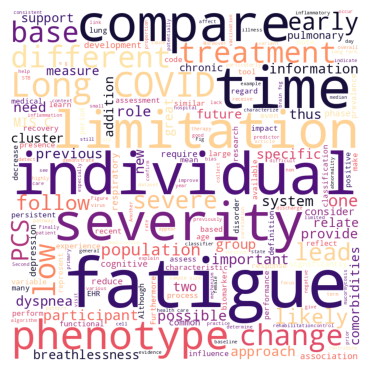

In [161]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(papers_csv['Tokens_Discussion_nostop'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Word Cloud for Abstract Section after removing all stop words (including context specific) and lemmatization**

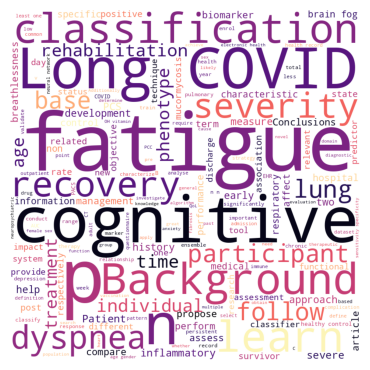

In [162]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(papers_csv['Tokens_Abstract_nostop'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



---



In [13]:
from google.colab import files
imported= files.upload()

Saving pulse.csv to pulse.csv


In [67]:
df= pd.read_csv(io.BytesIO(imported['pulse.csv']))

# *Long Covid Outcome Prediction*

**Initial Data Manipulation**

In [68]:
#Select subset of the data of those that indicated having had covid
data_covid= df[df['HADCOVIDRV']=='1']
#Drop HADCOVIDRV
data_covid= data_covid.drop('HADCOVIDRV', axis=1)

In [16]:
#Explore target variable and recode to binary. In order to avoid potetially distorting the results
#through inputation of values missing at random. ('M') and to avoid creating a new category
#for values not missing at random, I drop values both missing at random and not missing at random in the target var
print(set(data_covid['LONGCOVID']))
data_covid.loc[data_covid['LONGCOVID'].isin(['1']), 'LONGCOVID'] = 1
data_covid.loc[data_covid['LONGCOVID'].isin(['2']), 'LONGCOVID'] = 0
data_covid= data_covid[data_covid['LONGCOVID']!= 'M']
data_covid= data_covid[data_covid['LONGCOVID']!= '-99']
data_covid['LONGCOVID']=data_covid['LONGCOVID'].astype('int')
print('Number that reported having experienced Long Covid:', len(data_covid[data_covid['LONGCOVID']==1]))
print('Number that reported not having experienced Long Covid:', len(data_covid[data_covid['LONGCOVID']==0]))

{'M', '2', '1', '-99'}
Number that reported having experienced Long Covid: 9650
Number that reported not having experienced Long Covid: 28855


In [17]:
#Drop unnecesary colums
data_covid= data_covid.drop(['SCRAM', 'WEEK'], axis=1)

In [18]:
# Values missing not at random are coded as '-99' or -99. In order to avoid creating new categories when
# there are very few of these values, I will drop them if there are less than 1,000 of such values
for column in data_covid:
  if len(data_covid[data_covid[column]=='-99'])<1000:
    print(column)
    data_covid= data_covid[data_covid[column]!= '-99']
  elif len(data_covid[data_covid[column]==-99])<1000:
    print(column)
    data_covid= data_covid[data_covid[column]!= -99]

MS
GENID_DESCRIBE
KIDS_LT5Y
KIDS_5_11Y
KIDS_12_17Y
ENRPUBCHK
ENRPRVCHK
ENRHMSCHK
ENROLLNONE
ACTVDUTY1
ACTVDUTY2
ACTVDUTY3
ACTVDUTY4
ACTVDUTY5
RECVDVACC
WRKLOSSRV
ANYWORK
KINDWORK
RSNNOWRKRV
SETTING
EXPNS_DIF
CURFOODSUF
CHILDFOOD
FOODRSNRV1
FOODRSNRV2
FOODRSNRV3
FOODRSNRV4
FREEFOOD
ANXIOUS
WORRY
INTEREST
DOWN
HLTHINS1
HLTHINS2
HLTHINS3
HLTHINS4
HLTHINS5
HLTHINS6
HLTHINS7
HLTHINS8
SEEING
HEARING
REMEMBERING
MOBILITY
TENURE
LIVQTRRV
RENTCUR
MORTCUR
EVICT
FORCLOSE
ENERGY
HSE_TEMP
ENRGY_BILL
INCOME
UI_APPLYRV
UI_RECVRV
UI_RECVNOW
TWDAYS
SYMPTOMS
LONGCOVID
SYMPTMNOW
SELFCARE
UNDERSTAND
RENTCHNG
SYMPTMIMPCT
PRICECHNG
PRICESTRESS
PRICECOPE1
PRICECOPE2
PRICECOPE3
PRICECOPE4
PRICECOPE5
PRICECOPE6
PRICECOPE7
PRICECOPE8
PRICECOPE9
PRICECOPE10
PRICECOPE11
PRICECOPE12
PRICECOPE13
PRICECOPE14
PRICECOPE15
PRICECOPE16
PRICECOPE17
PRICECOPE18
PRICECOPE19
PRICECONCRN
TWDAYS_RESP
SPND_SRCRV1
SPND_SRCRV2
SPND_SRCRV3
SPND_SRCRV4
SPND_SRCRV5
SPND_SRCRV6
SPND_SRCRV7
SPND_SRCRV8
SPND_SRCRV9
SPND_SRCRV10
SPND_S

In [19]:
#Recode 'M' as np.nan
data_covid= data_covid.replace({'M':np.nan})

In [20]:
#Drop columns with more than 50% missing values (missing at random)
for column in data_covid:
  if column != 'LONGCOVID':
    if data_covid[column].isnull().sum() > (len(data_covid)/2):
        data_covid=data_covid.drop(column, axis=1)

In [21]:
#From review of data dictionary compile list of numeric or ordinal variables
list_numeric=['TBIRTH_YEAR', 'THHLD_NUMPER', 'THHLD_NUMKID', 'THHLD_NUMADLT', 'TENROLLPRV', 'TENROLLHMSCH', 'SYMPTOMS','SYMPTMIMPCT', 'PRICESTRESS', 'PRICECONCRN', 'EXPNS_DIF', 'CURFOODSUF', 'TSPNDFOOD', 'TSPNDPRPD', 'ND_HOWLONG', 'ND_DAMAGE', 'ND_FDSHRTAGE', 'ND_WATER', 'ND_UNSANITARY', 'ND_ISOLATE', 'ND_CRIME', 'ND_SCAM', 'ANXIOUS', 'WORRY','INTEREST','DOWN','MHLTH_NEED', 'MHLTH_GET', 'MHLTH_SATISFD','MHLTH_DIFFCLT','SEEING','HEARING', 'MOBILITY', 'REMEMBERING', 'SELFCARE', 'UNDERSTAND', 'INCOME', 'ABIRTH_YEAR', 'PWEIGHT','HWEIGHT' ]

In [22]:
#Check if there are any numeric variables with values missing not at random and how many. Since they are only 2,
#I choose to drop them.
for column in data_covid:
  if column in list_numeric:
    if '-99' in set(data_covid[column]):
      print(column, len(data_covid[data_covid[column]=='-99']))
      data_covid= data_covid.drop(column, axis=1)
    elif -99 in set(data_covid[column]):
      print(column, len(data_covid[data_covid[column]==-99]))
      data_covid= data_covid.drop(column, axis=1)

In [23]:
#Now that no values NMAR in numeric/ordinal columns, turn them to numeric
for column in data_covid:
  if column in list_numeric:
    data_covid[column]= data_covid[column].astype('float')

In [24]:
#Explore variables that can be turned to dummy
for column in data_covid:
  if column not in list_numeric:
    if len(set(data_covid[column])) == 2:
      print(column, set(data_covid[column]))

ACTVDUTY1 {1, -99}
ACTVDUTY2 {1, -99}
ACTVDUTY3 {1, -99}
ACTVDUTY4 {1, -99}
ACTVDUTY5 {1, -99}
RECVDVACC {'2', '1'}
LONGCOVID {0, 1}
WHENCOVIDRV1 {'1', '-99'}
WHENCOVIDRV2 {'-99', '1'}
WHENCOVIDRV3 {'1', '-99'}
AGENID_BIRTH {1, 2}
EGENID_BIRTH {1, 2}
AHISPANIC {1, 2}
ARACE {1, 2}
AHHLD_NUMPER {1, 2}
AHHLD_NUMKID {1, 2}
RHISPANIC {1, 2}
AEDUC {1, 2}


In [25]:
#Turn them to dummy variables. Note that for variables with '1' and '-99' (missing NAR), the meaning of the variable
#is inputed or not. Make list of dummy
list_dummy=[]
for column in data_covid:
  if column not in list_numeric:
    if len(set(data_covid[column])) ==2:
      if column != 'LONGCOVID':
        data_covid[column]= data_covid[column].replace({'1': 1, '2':0, '-99':0, 2:0, -99: 0})
        data_covid[column]= data_covid[column].astype('int')
        list_dummy.append(column)

In [26]:
#Check if recoded into dummy correctly
for column in data_covid:
  if column not in list_numeric:
    if len(set(data_covid[column])) < 3:
      print(column, set(data_covid[column]))

ACTVDUTY1 {0, 1}
ACTVDUTY2 {0, 1}
ACTVDUTY3 {0, 1}
ACTVDUTY4 {0, 1}
ACTVDUTY5 {0, 1}
RECVDVACC {0, 1}
LONGCOVID {0, 1}
WHENCOVIDRV1 {0, 1}
WHENCOVIDRV2 {0, 1}
WHENCOVIDRV3 {0, 1}
AGENID_BIRTH {0, 1}
EGENID_BIRTH {0, 1}
AHISPANIC {0, 1}
ARACE {0, 1}
AHHLD_NUMPER {0, 1}
AHHLD_NUMKID {0, 1}
RHISPANIC {0, 1}
AEDUC {0, 1}


In [27]:
#Turn variables not numeric/ordinal or dummy into string. Make a list of string variables.
list_string=[]
for column in data_covid:
  if column != 'LONGCOVID':
    if column not in list_numeric and column not in list_dummy:
      data_covid[column]=data_covid[column].astype('str')
      list_string.append(column)

**Exploration of Predictors and Target Variable ('LONGCOVID')**

Axes(0.125,0.11;0.62x0.77)
ANXIOUS WORRY 0.8093081830297439
WORRY ANXIOUS 0.8093081830297439
WORRY DOWN 0.7063812270786235
INTEREST DOWN 0.7927093798979801
DOWN WORRY 0.7063812270786235
DOWN INTEREST 0.79270937989798
PRICESTRESS PRICECONCRN 0.7094183512932636
PRICECONCRN PRICESTRESS 0.7094183512932637
THHLD_NUMPER THHLD_NUMKID 0.7823899140562781
THHLD_NUMKID THHLD_NUMPER 0.7823899140562781
PWEIGHT HWEIGHT 0.8756295399367711
HWEIGHT PWEIGHT 0.8756295399367712


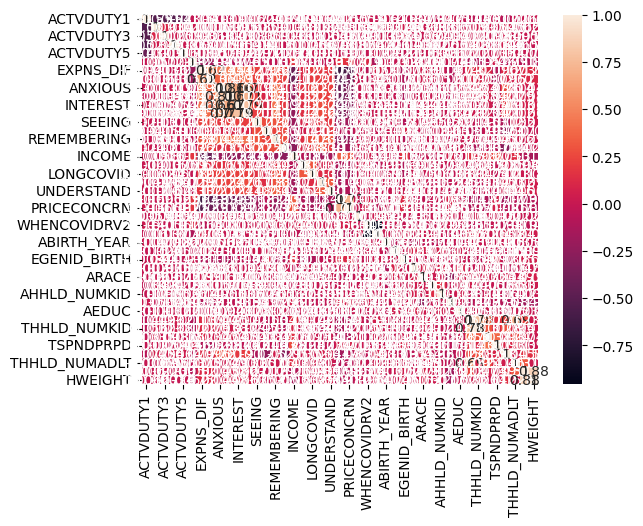

In [28]:
#Check for collinearity, print correlations among numeric vars greater than 0.7. Create list of unique value pairs.
list_highly_correlated=[]
corr_matrix= data_covid.corr()
print(sns.heatmap(corr_matrix, annot=True))
for i in data_covid:
  if i in list_numeric:
    for j in data_covid:
      if j in list_numeric:
        if i != j:
          if i != 'LONGCOVID' or j != 'LONGCOVID':
            if abs(data_covid[i].corr(data_covid[j])) >0.7:
              print(i,j,data_covid[i].corr(data_covid[j]))
              if [i, j] not in list_highly_correlated and [j, i] not in list_highly_correlated:
                list_highly_correlated.append([i, j])

In [29]:
#Check list of value pair lists
print(list_highly_correlated)

[['ANXIOUS', 'WORRY'], ['WORRY', 'DOWN'], ['INTEREST', 'DOWN'], ['PRICESTRESS', 'PRICECONCRN'], ['THHLD_NUMPER', 'THHLD_NUMKID'], ['PWEIGHT', 'HWEIGHT']]


In [30]:
#For each pair, drop var least correlated with target variable
dropped_colinearity=[]
for pair in list_highly_correlated:
  if pair[0] not in dropped_colinearity and pair[1] not in dropped_colinearity:
      if abs(data_covid['LONGCOVID'].corr(data_covid[pair[0]])) > abs(data_covid['LONGCOVID'].corr(data_covid[pair[1]])):
        data_covid= data_covid.drop(pair[1], axis=1)
        dropped_colinearity.append(pair[1])
      else:
        data_covid= data_covid.drop(pair[0], axis=1)
        dropped_colinearity.append(pair[0])
print('Variables dropped:', dropped_colinearity)

Variables dropped: ['WORRY', 'DOWN', 'PRICECONCRN', 'THHLD_NUMKID', 'HWEIGHT']


In [31]:
#Check if there are any notable, unreasonable outliers. 'PWEIGHT' (person-level weight)
#seems to have extremely varying values, which suggests that they are not all on
#the same scale or were inputed incorrectly. As such, I decide to drop it.
print(data_covid.describe())
data_covid= data_covid.drop(['PWEIGHT'], axis=1)

          ACTVDUTY1     ACTVDUTY2     ACTVDUTY3     ACTVDUTY4     ACTVDUTY5  \
count  31360.000000  31360.000000  31360.000000  31360.000000  31360.000000   
mean       0.987532      0.003508      0.003253      0.003412      0.002296   
std        0.110964      0.059122      0.056939      0.058313      0.047861   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          RECVDVACC     EXPNS_DIF    CURFOODSUF       ANXIOUS      INTEREST  \
count  31360.000000  29796.000000  29400.000000  27821.000000  27821.000000   
mean       0.880517      2.018828      1.434286      1.977427      1.673125   
std        0.324362      1.046662      0.671871    

In [32]:
#Create list of columns with missing
list_with_missing=[]
for column in data_covid:
  if data_covid[column].isna().sum() >0:
    list_with_missing.append(column)
print(list_with_missing)

['EXPNS_DIF', 'CURFOODSUF', 'ANXIOUS', 'INTEREST', 'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'INCOME', 'SELFCARE', 'UNDERSTAND', 'PRICESTRESS', 'TSPNDFOOD', 'TSPNDPRPD']


**Split Dataset**

In [33]:
#Split dataset into training, validation and test sets
train= data_covid.sample(frac=0.6, random_state=36)
other= data_covid.drop(train.index)
validation= other.sample(frac=0.5, random_state=36)
test= other.drop(validation.index)

In [34]:
#Divide into X_train, X_validation, X_test, Y_train, Y_validation, Y_test
Y_train= train['LONGCOVID'].to_numpy()
X_train= train.drop('LONGCOVID', axis=1)
Y_validation= validation['LONGCOVID'].to_numpy()
X_validation= validation.drop('LONGCOVID', axis=1)
Y_test= test['LONGCOVID'].to_numpy()
X_test= test.drop('LONGCOVID', axis=1)

**Feature engineering and preprocessing on the Training set**

In [35]:
#Impute values missing at random with mode
imputer= SimpleImputer(strategy='most_frequent')
X_train[list_with_missing]= imputer.fit_transform(X_train[list_with_missing])

In [36]:
#Target encode multi-level (>2), non-ordinal categorical variables
encoder=TargetEncoder()
X_train[list_string]= encoder.fit_transform(X_train[list_string], Y_train)

In [37]:
#Check target var class balance in the Training set
print((len(train[train['LONGCOVID']==1])/len(train)),'indicated experiencing Long Covid')
print((len(train[train['LONGCOVID']==0])/len(train)),'indicated not experiencing Long Covid')

0.24372874149659865 indicated experiencing Long Covid
0.7562712585034014 indicated not experiencing Long Covid


In [38]:
#Use RandomUnderSampler to undersample majority class (LONGCOVID=='0')
undersampler= RandomUnderSampler(random_state=36)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

In [39]:
#Check class balance after resampling
print(len(Y_train_resampled[Y_train_resampled==1])/len(Y_train_resampled))
print(len(Y_train_resampled[Y_train_resampled==0])/len(Y_train_resampled))

0.5
0.5


In [40]:
#Check data types
X_train_resampled.dtypes

MS                float64
GENID_DESCRIBE    float64
ACTVDUTY1           int64
ACTVDUTY2           int64
ACTVDUTY3           int64
                   ...   
THHLD_NUMADLT     float64
EST_ST            float64
PRIVHLTH          float64
PUBHLTH           float64
REGION            float64
Length: 123, dtype: object

**Feature engineering and preprocessing on the Validation and Test sets**

In [41]:
#Impute values missing at random with mode
X_validation[list_with_missing]= imputer.transform(X_validation[list_with_missing])
X_test[list_with_missing]= imputer.transform(X_test[list_with_missing])

In [42]:
#Target encode multi-level (>2), non-ordinal categorical variables
X_validation[list_string]= encoder.transform(X_validation[list_string])
X_test[list_string]= encoder.transform(X_test[list_string])

In [43]:
#Check data types
print(X_validation.dtypes)
print(X_test.dtypes)

MS                float64
GENID_DESCRIBE    float64
ACTVDUTY1           int64
ACTVDUTY2           int64
ACTVDUTY3           int64
                   ...   
THHLD_NUMADLT     float64
EST_ST            float64
PRIVHLTH          float64
PUBHLTH           float64
REGION            float64
Length: 123, dtype: object
MS                float64
GENID_DESCRIBE    float64
ACTVDUTY1           int64
ACTVDUTY2           int64
ACTVDUTY3           int64
                   ...   
THHLD_NUMADLT     float64
EST_ST            float64
PRIVHLTH          float64
PUBHLTH           float64
REGION            float64
Length: 123, dtype: object


**Model Building**

**Recursive feature elimination with Logistic Regression**

In [44]:
# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_train_resampled, Y_train_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 68


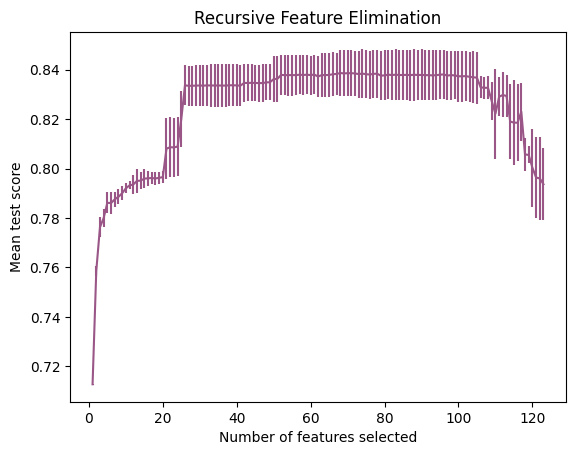

In [45]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

In [46]:
#Select subset with selected features by rfecv
X_train_resampled = X_train_resampled.loc[:, rfecv.support_]
X_validation= X_validation.loc[:, rfecv.support_]
X_test=X_test.loc[:, rfecv.support_]


**Define Function for Scores/Metrics of Models**

In [47]:
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

**Logistic Regression**

In [48]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [49]:
# Make predictions on the validation and training sets
y_pred_validation = model.predict(X_validation.to_numpy())
y_pred_train = model.predict(X_train_resampled.to_numpy())

======== Training Set ==========
AUC :  0.7693080362001725
Accuracy :  0.7617749672917575
Confusion Matrix:
[[3877 1476]
 [ 709 3110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      5353
           1       0.68      0.81      0.74      3819

    accuracy                           0.76      9172
   macro avg       0.76      0.77      0.76      9172
weighted avg       0.78      0.76      0.76      9172

======== Validation Set ==========
AUC :  0.7477950615956204
Accuracy :  0.8081951530612245
Confusion Matrix:
[[3972  485]
 [ 718 1097]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4457
           1       0.69      0.60      0.65      1815

    accuracy                           0.81      6272
   macro avg       0.77      0.75      0.76      6272
weighted avg       0.80      0.81      0.80      6272



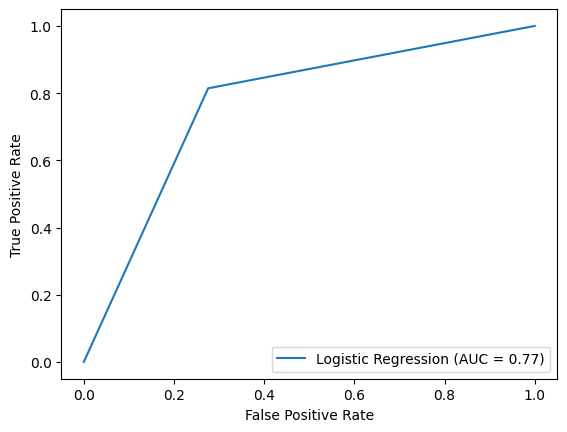

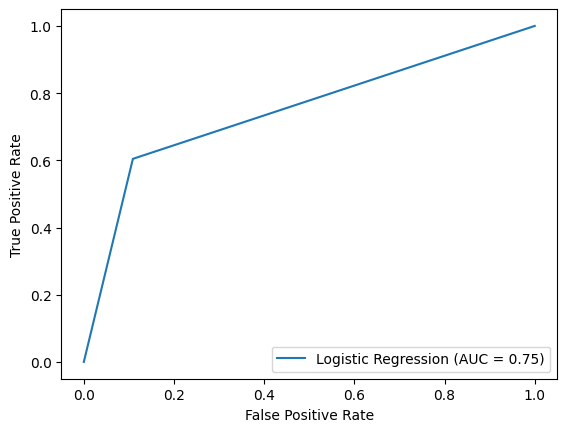

In [50]:
# Calculate evaluation metrics and scores for the validation and training sets
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(y_pred_validation, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_lt, tpr_lt, thresholds_lt = roc_curve(y_pred_train, Y_train_resampled)
roc_auc_lt = auc(fpr_lt, tpr_lt)
display = RocCurveDisplay(fpr=fpr_lt, tpr=tpr_lt, roc_auc=roc_auc_lt, estimator_name='Logistic Regression')
display.plot()

# Plot the ROC curve for the validation set
fpr_lv, tpr_lv, thresholds_lv = roc_curve(y_pred_validation, Y_validation)
roc_auc_lv = auc(fpr_lv, tpr_lv)
display = RocCurveDisplay(fpr=fpr_lv, tpr=tpr_lv, roc_auc=roc_auc_lv, estimator_name='Logistic Regression')
display.plot()

In [51]:
# Setting hyperparameters for Logistic Regression for the Grid Search.
param_dist = {
    'class_weight': [None, 'balanced'],
    'penalty' : ['l1','l2'],
    'C' : [0.25, 0.5, 0.75,1.0, 1.25, 1.5, 2, 5],
    'solver' : ['liblinear'],
}

# Initializing stratified K-fold cross-validation.
skf = StratifiedKFold(n_splits=5)

In [52]:
# Setting up GridSearchCV to search through the parameter space.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(X_train_resampled, Y_train_resampled)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,16.259704,2.164944,0.004072,0.000482,1.5,None,l1,liblinear,"{'C': 1.5, 'class_weight': None, 'penalty': 'l...",0.768392,0.755858,0.752454,0.75627,0.753544,0.757304,0.005723,1
22,15.953552,1.887873,0.004963,0.000785,1.5,balanced,l1,liblinear,"{'C': 1.5, 'class_weight': 'balanced', 'penalt...",0.768392,0.755858,0.752454,0.75627,0.753544,0.757304,0.005723,1


In [53]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_resampled, Y_train_resampled)

# Predicting on the training dataset and computing the accuracy
Y_pred_train_tuned = model.predict(X_train_resampled)
print(accuracy_score(Y_train_resampled, Y_pred_train_tuned))

# Predicting on the test dataset and computing the accuracy
Y_pred_validation_tuned = model.predict(X_validation)
print(accuracy_score(Y_validation, Y_pred_validation_tuned))

0.7628652420409944
0.8064413265306123


======== Training Set ==========
AUC :  0.7703487520579628
Accuracy :  0.7628652420409944
Confusion Matrix:
[[3880 1469]
 [ 706 3117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      5349
           1       0.68      0.82      0.74      3823

    accuracy                           0.76      9172
   macro avg       0.76      0.77      0.76      9172
weighted avg       0.78      0.76      0.76      9172

======== Validation Set ==========
AUC :  0.7459058219725767
Accuracy :  0.8064413265306123
Confusion Matrix:
[[3959  483]
 [ 731 1099]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4442
           1       0.69      0.60      0.64      1830

    accuracy                           0.81      6272
   macro avg       0.77      0.75      0.76      6272
weighted avg       0.80      0.81      0.80      6272



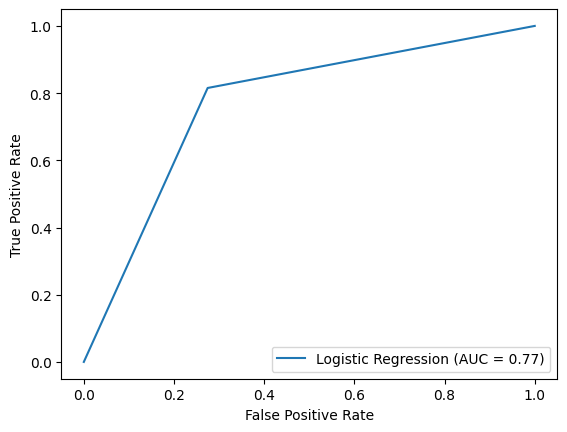

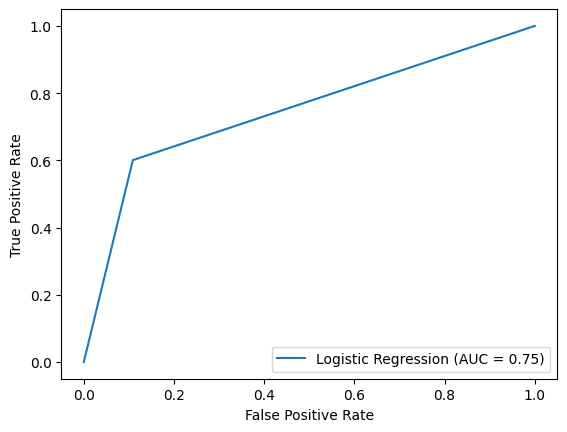

In [54]:
# Calculate evaluation metrics and scores for the validation and training sets after Hyperparameter Tuning
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(Y_pred_validation_tuned, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train_tuned, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_lt, tpr_lt, thresholds_lt = roc_curve(Y_pred_train_tuned, Y_train_resampled)
roc_auc_lt = auc(fpr_lt, tpr_lt)
display = RocCurveDisplay(fpr=fpr_lt, tpr=tpr_lt, roc_auc=roc_auc_lt, estimator_name='Logistic Regression')
display.plot()

# Plot the ROC curve for the validation set
fpr_lv, tpr_lv, thresholds_lv = roc_curve(Y_pred_validation_tuned, Y_validation)
roc_auc_lv = auc(fpr_lv, tpr_lv)
display = RocCurveDisplay(fpr=fpr_lv, tpr=tpr_lv, roc_auc=roc_auc_lv, estimator_name='Logistic Regression')
display.plot()

**Neural Network**

In [55]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 15
hidden_units_layer_2 = 15

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((68, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [56]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [57]:
# Convert the training data to PyTorch tensors
X = t.tensor(X_train_resampled.to_numpy()).type(t.float32)
Y = t.tensor(Y_train_resampled.astype(int)).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters (which I reached after some innitial trials)
epochs = 2500
learning_rate = 0.0001
batch_size = 32
# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [58]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    print('Process:', epoch)
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)
        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51
Process: 52
Process: 53
Process: 54
Process: 55
Process: 56
Process: 57
Process: 58
Process: 59
Process: 60
Process: 61
Process: 62
Process: 63
Process: 64
Process: 65
Process: 66
Process: 67
Process: 68
Process: 69
Process: 70
Process: 71
Process: 72
Process: 73
Process: 74
Process: 75
Process: 76
Process: 77
Process: 78
Process: 79
Process: 80
Process: 81
Process: 82
Process: 83
Pr

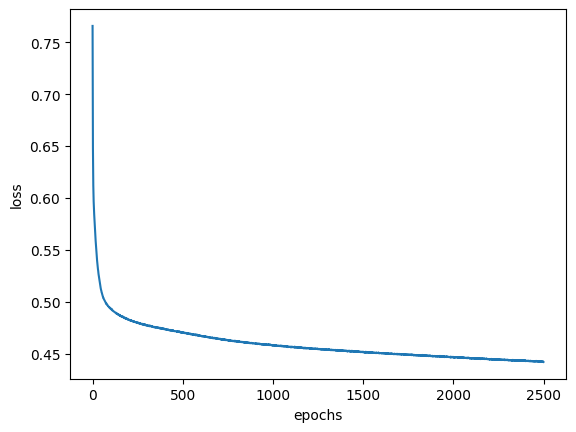

In [59]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [60]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_validation.to_numpy()).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_validation.astype(int)).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train_resampled.to_numpy()).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train_resampled.astype(int)).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.4740782380104065
0.4417305588722229


In [61]:
# Defining the parameters
number_of_input_features = 68
number_of_hidden_units = 15
epochs = 2500
learning_rate = 0.0001
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer
# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train_resampled.to_numpy()).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_resampled.astype(int)).type(t.float32)

X_validation_tensor = t.Tensor(X_validation.to_numpy()).type(t.float32)
Y_validation_tensor = t.Tensor(Y_validation.astype(int)).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = t.nn.BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)
        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term
        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction_train = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_validation_tensor)
        prediction_validation = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction_validation == Y_validation_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/2500 ---> train_accuracy : 0.4815743565559387 , validation_accuracy : 0.3203125
epoch 1/2500 ---> train_accuracy : 0.5589838624000549 , validation_accuracy : 0.4413265287876129
epoch 2/2500 ---> train_accuracy : 0.6870911717414856 , validation_accuracy : 0.6945152878761292
epoch 3/2500 ---> train_accuracy : 0.6929786205291748 , validation_accuracy : 0.6972257494926453
epoch 4/2500 ---> train_accuracy : 0.7061709761619568 , validation_accuracy : 0.7351722121238708
epoch 5/2500 ---> train_accuracy : 0.7075883150100708 , validation_accuracy : 0.7048788070678711
epoch 6/2500 ---> train_accuracy : 0.7104230523109436 , validation_accuracy : 0.7669005393981934
epoch 7/2500 ---> train_accuracy : 0.7256868481636047 , validation_accuracy : 0.7397959232330322
epoch 8/2500 ---> train_accuracy : 0.7262319922447205 , validation_accuracy : 0.7611607313156128
epoch 9/2500 ---> train_accuracy : 0.7256868481636047 , validation_accuracy : 0.7571747303009033
epoch 10/2500 ---> train_accuracy : 0.7

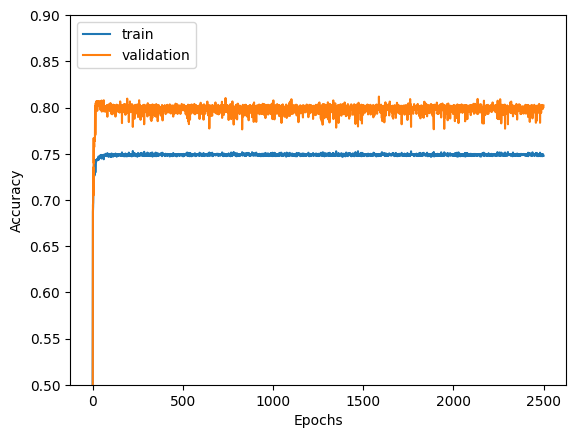

In [62]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.show()

In [63]:
# Evaluate the model
# Training set
conf_matrix = confusion_matrix(Y_train_resampled, prediction_train)
class_report = classification_report(Y_train_resampled, prediction_train)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[3852  734]
 [1580 3006]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      4586
           1       0.80      0.66      0.72      4586

    accuracy                           0.75      9172
   macro avg       0.76      0.75      0.75      9172
weighted avg       0.76      0.75      0.75      9172



In [64]:
# Evaluate the model
# validation set
conf_matrix = confusion_matrix(Y_validation, prediction_validation)
class_report = classification_report(Y_validation, prediction_validation)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[3958  732]
 [ 509 1073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4690
           1       0.59      0.68      0.63      1582

    accuracy                           0.80      6272
   macro avg       0.74      0.76      0.75      6272
weighted avg       0.81      0.80      0.81      6272



**XGBoost Classifier**

In [55]:
# Create and train the Gradient Boosting CLassifier
grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
model= grad_boost.fit(X_train_resampled, Y_train_resampled)
# Make predictions on the training and validation sets
Y_pred_train = model.predict(X_train_resampled)
Y_pred_validation = model.predict(X_test)

======== Training Set ==========
AUC :  0.7773059626634171
Accuracy :  0.7713693850850414
Confusion Matrix:
[[3873 1384]
 [ 713 3202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      5257
           1       0.70      0.82      0.75      3915

    accuracy                           0.77      9172
   macro avg       0.77      0.78      0.77      9172
weighted avg       0.78      0.77      0.77      9172

======== Validation Set ==========
AUC :  0.4967033817754859
Accuracy :  0.5927933673469388
Confusion Matrix:
[[3241 1105]
 [1449  477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      4346
           1       0.30      0.25      0.27      1926

    accuracy                           0.59      6272
   macro avg       0.50      0.50      0.49      6272
weighted avg       0.57      0.59      0.58      6272



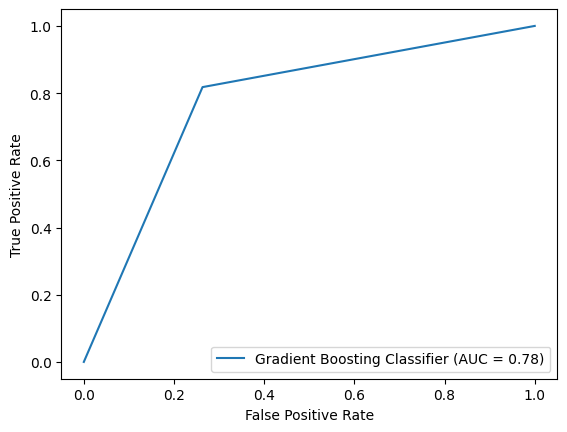

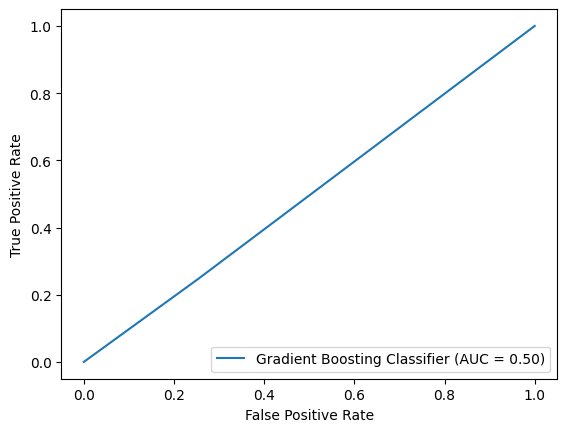

In [56]:
# Calculate evaluation metrics and scores for the validation and training sets
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(Y_pred_validation, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_pred_train, Y_train_resampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='XGBoost Classifier')
display.plot()

# Plot the ROC curve for the validation set
fpr_rfv, tpr_rfv, thresholds_rfv = roc_curve(Y_pred_validation, Y_validation)
roc_auc_rfv = auc(fpr_rfv, tpr_rfv)
display = RocCurveDisplay(fpr=fpr_rfv, tpr=tpr_rfv, roc_auc=roc_auc_rfv, estimator_name='XGBoost Classifier')
display.plot()

In [64]:
# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [1, 5, 10, 15],
    "min_samples_leaf" : [5, 10, 15, 20, 25],
    "learning_rate" : [0.01, .1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)
# Running the GridSearchCV on the training data.
random_search.fit(X_train_resampled, Y_train_resampled)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,1.665727,0.305183,0.008198,0.001499,0.2,1,25,200,"{'learning_rate': 0.2, 'max_depth': 1, 'min_sa...",0.774932,0.758583,0.760632,0.754089,0.758451,0.761338,0.007124,1


In [65]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_resampled, Y_train_resampled)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_resampled)
print(accuracy_score(Y_train_resampled, Y_pred_train))

# Predicting on the validation dataset and computing the accuracy
Y_pred_validation = model.predict(X_validation)
print(accuracy_score(Y_validation, Y_pred_validation))

0.7679895333624073
0.8080357142857143


======== Training Set ==========
AUC :  0.7754350316280015
Accuracy :  0.7679895333624073
Confusion Matrix:
[[3899 1441]
 [ 687 3145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      5340
           1       0.69      0.82      0.75      3832

    accuracy                           0.77      9172
   macro avg       0.77      0.78      0.77      9172
weighted avg       0.78      0.77      0.77      9172

======== Validation Set ==========
AUC :  0.7477087778586318
Accuracy :  0.8080357142857143
Confusion Matrix:
[[3968  482]
 [ 722 1100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4450
           1       0.70      0.60      0.65      1822

    accuracy                           0.81      6272
   macro avg       0.77      0.75      0.76      6272
weighted avg       0.80      0.81      0.80      6272



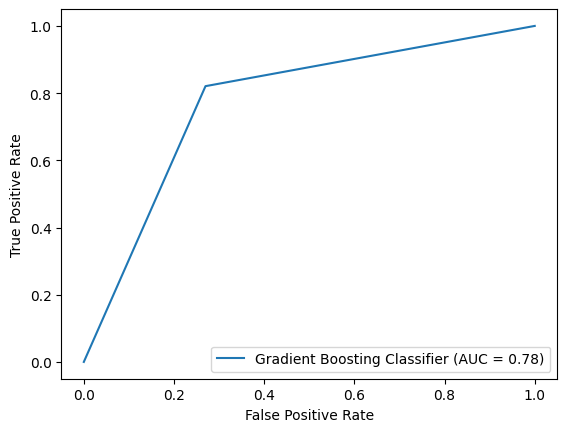

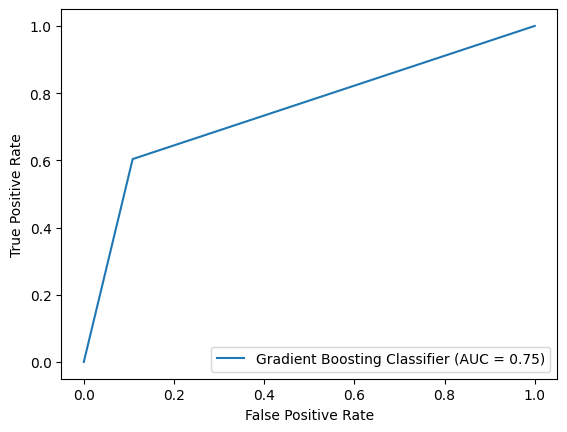

In [66]:
# Calculate evaluation metrics and scores for the validation and training sets
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(Y_pred_validation, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_pred_train, Y_train_resampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='XGBoost Classifier')
display.plot()

# Plot the ROC curve for the validation set
fpr_rfv, tpr_rfv, thresholds_rfv = roc_curve(Y_pred_validation, Y_validation)
roc_auc_rfv = auc(fpr_rfv, tpr_rfv)
display = RocCurveDisplay(fpr=fpr_rfv, tpr=tpr_rfv, roc_auc=roc_auc_rfv, estimator_name='XGBoost Classifier')
display.plot()

**Support Vector Classifier**

In [55]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear')
model=svm_classifier.fit(X_train_resampled, Y_train_resampled)
# Make predictions on the training and validation sets
Y_pred_train = svm_classifier.predict(X_train_resampled)
Y_pred_validation = svm_classifier.predict(X_test)

======== Training Set ==========
AUC :  0.7742732053327339
Accuracy :  0.7624291321412996
Confusion Matrix:
[[3973 1566]
 [ 613 3020]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.78      5539
           1       0.66      0.83      0.73      3633

    accuracy                           0.76      9172
   macro avg       0.76      0.77      0.76      9172
weighted avg       0.78      0.76      0.77      9172

======== Validation Set ==========
AUC :  0.49675908315310124
Accuracy :  0.6095344387755102
Confusion Matrix:
[[3398 1157]
 [1292  425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      4555
           1       0.27      0.25      0.26      1717

    accuracy                           0.61      6272
   macro avg       0.50      0.50      0.50      6272
weighted avg       0.60      0.61      0.60      6272



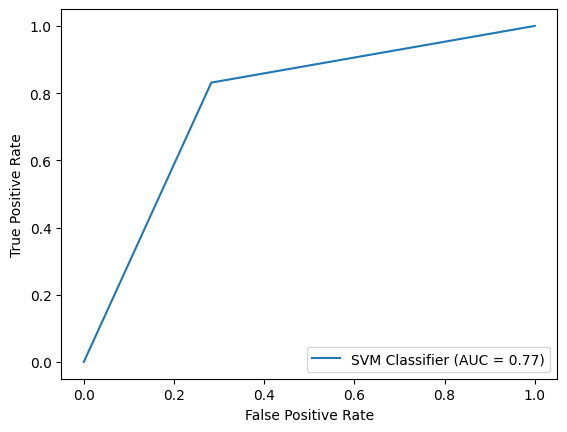

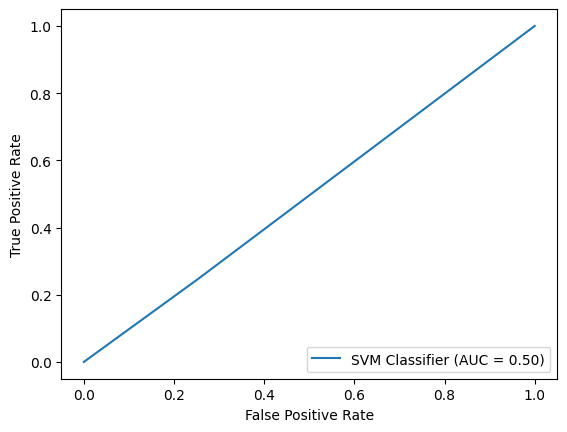

In [56]:
# Calculate evaluation metrics and scores for the validation and training sets
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(Y_pred_validation, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_pred_train, Y_train_resampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='SVM Classifier')
display.plot()

# Plot the ROC curve for the validation set
fpr_rfv, tpr_rfv, thresholds_rfv = roc_curve(Y_pred_validation, Y_validation)
roc_auc_rfv = auc(fpr_rfv, tpr_rfv)
display = RocCurveDisplay(fpr=fpr_rfv, tpr=tpr_rfv, roc_auc=roc_auc_rfv, estimator_name='SVM Classifier')
display.plot()

In [57]:
# Create an instance of the Support Vector Classifier (SVC) with class weight balancing
svm = SVC(class_weight='balanced')

# Define a dictionary of hyperparameter values to search over
param_dist = {
    'class_weight': [None, 'balanced'],  # Options for class weight balancing
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter values to search
    'kernel': ["linear"],  # Kernel function
    'gamma': [0.01, 1, 10]  # Kernel coefficient values to search
}

# Create a StratifiedKFold cross-validation object with 3 folds
skf = StratifiedKFold(n_splits=3)

# Perform a grid search with cross-validation to find the best hyperparameters
random_search = GridSearchCV(
    svm,  # SVM classifier instance
    param_grid=param_dist,  # Hyperparameter grid to search
    cv=skf,  # Cross-validation strategy (StratifiedKFold)
    scoring='f1_micro'  # Scoring metric ('f1_micro' for balanced evaluation)
)
# Running the GridSearchCV on the training data.
random_search.fit(X_train_resampled, Y_train_resampled)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,2.008078,0.114603,0.575667,0.102163,1,balanced,0.01,linear,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.766514,0.754989,0.750736,0.757413,0.006666,1
16,1.435884,0.046365,0.428241,0.003143,1,balanced,1,linear,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.766514,0.754989,0.750736,0.757413,0.006666,1
17,1.651315,0.319636,0.570234,0.093536,1,balanced,10,linear,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.766514,0.754989,0.750736,0.757413,0.006666,1


In [58]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_resampled, Y_train_resampled)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_resampled)
print(accuracy_score(Y_train_resampled, Y_pred_train))

# Predicting on the validation dataset and computing the accuracy
Y_pred_validation = model.predict(X_validation)
print(accuracy_score(Y_validation, Y_pred_validation))

0.7624291321412996
0.8158482142857143


======== Training Set ==========
AUC :  0.7742732053327339
Accuracy :  0.7624291321412996
Confusion Matrix:
[[3973 1566]
 [ 613 3020]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.78      5539
           1       0.66      0.83      0.73      3633

    accuracy                           0.76      9172
   macro avg       0.76      0.77      0.76      9172
weighted avg       0.78      0.76      0.77      9172

======== Validation Set ==========
AUC :  0.756117743829731
Accuracy :  0.8158482142857143
Confusion Matrix:
[[4051  516]
 [ 639 1066]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4567
           1       0.67      0.63      0.65      1705

    accuracy                           0.82      6272
   macro avg       0.77      0.76      0.76      6272
weighted avg       0.81      0.82      0.81      6272



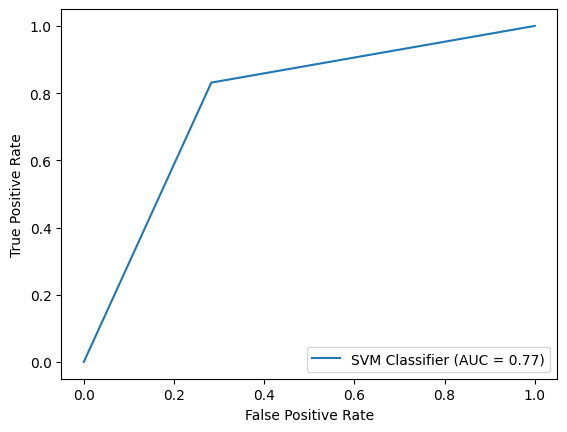

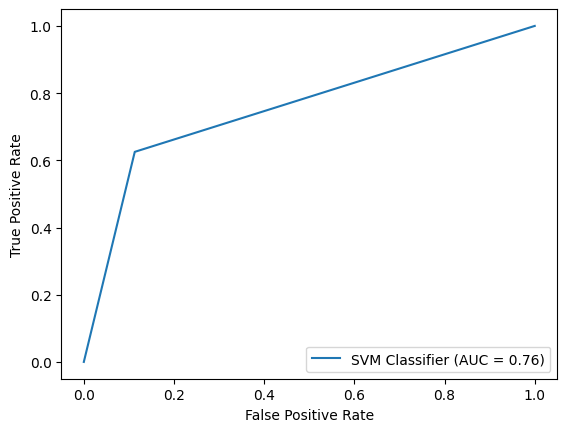

In [59]:
# Calculate evaluation metrics and scores for the validation and training sets after Hyperparameter Tuning
conf_matrix_validation, class_report_validation, auc_validation, acc_validation = get_scores(Y_pred_validation, Y_validation)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train, Y_train_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_validation, class_report_validation, auc_validation, acc_validation)

# Plot the ROC curve for the training set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_pred_train, Y_train_resampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='SVM Classifier')
display.plot()

# Plot the ROC curve for the validation set
fpr_rfv, tpr_rfv, thresholds_rfv = roc_curve(Y_pred_validation, Y_validation)
roc_auc_rfv = auc(fpr_rfv, tpr_rfv)
display = RocCurveDisplay(fpr=fpr_rfv, tpr=tpr_rfv, roc_auc=roc_auc_rfv, estimator_name='SVM Classifier')
display.plot()

**Best Model (SVM Classifier) Performance on Unseen Test Set & Shap Values**

In [60]:
# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred_test))

0.8078762755102041


In [61]:
# Calculate evaluation metrics and scores for the test set
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(Y_pred_test, Y_test)

In [62]:
# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

======== Test Set ==========
AUC :  0.7483428132314103
Accuracy :  0.8078762755102041
Confusion Matrix:
[[4008  547]
 [ 658 1059]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4555
           1       0.66      0.62      0.64      1717

    accuracy                           0.81      6272
   macro avg       0.76      0.75      0.75      6272
weighted avg       0.80      0.81      0.81      6272



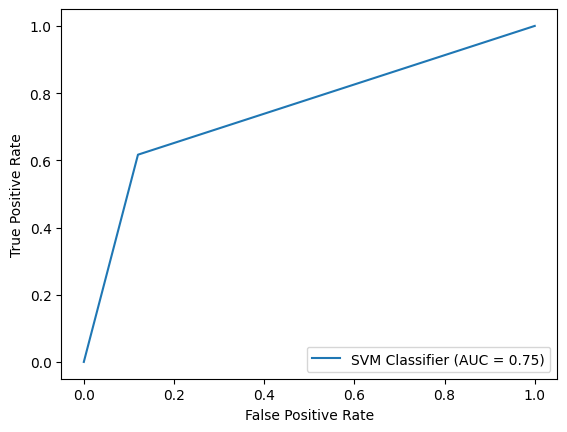

In [108]:
# Plot the ROC curve for the test set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_pred_test, Y_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='SVM Classifier')
display.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

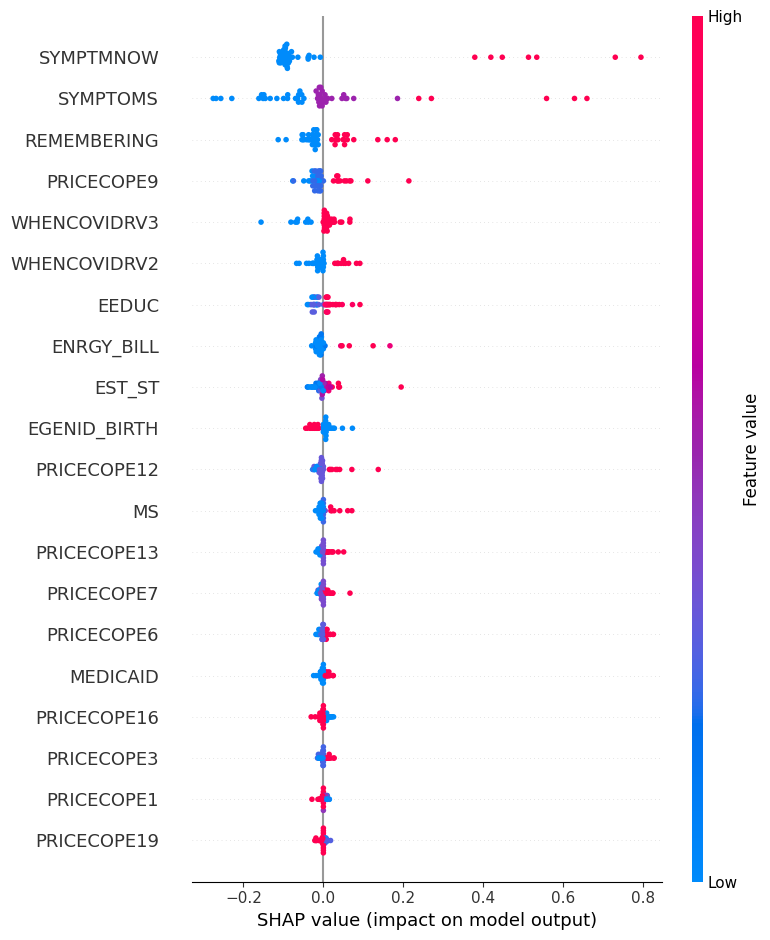

In [63]:
#Create function for model prediction
def model_pred(X):
  return model.predict(X)
#Create Shap Explainer. Select subset for approximation purposes.
explainer = shap.KernelExplainer(model_pred, X_test.iloc[:50,:])
#Get Shap Values. Select subset for approximation purposes.
shap_values = explainer.shap_values(X_test.iloc[:50,:])
#Summarize values with plot
shap.summary_plot(shap_values, X_test.iloc[:50, :])